Assignment for Clinton Boyda

# Lab 2: Decision Trees

Following up from the KNN algorithm you will now be introduced to the Decision Tree algorithm. DTs are able to naturally handle non-linear multi-class data. The algorithm is not a distance based classifer like the KNN, instead it makes multiple binary classifications at each node (leaf) of the tree in order to arrived at a prediction. For this lab you will be using the built-in wine dataset. For this lab you will need to install the following extra libraries
- graphviz: 'pip install graphviz'
- pydotplus: 'pip install pydotplus'

In [1]:
#Crucial data processing and analysis libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Loading the modules required to build and evaluate a DT model
from sklearn.tree import DecisionTreeClassifier #The algorithm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score


#Loading the wine dataset from sklearn
from sklearn.datasets import load_wine

##### Loading our data onto a dataframe the same way you encountered previously in lab 1.

In [2]:
#loading data
wine = load_wine() # not a dataframe

# There are three key parts to the dataset we care about
#(1) The features(X)
X = wine.data


#(2) The target classes(y)
y = wine.target

df = pd.DataFrame(X, columns=wine['feature_names']) # is a dataframe
df['class'] = wine.target


print("Number of rows in the data: " + str(df.shape[0]))
df.head()

Number of rows in the data: 178


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [3]:
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

##### Always a good idea to observe some statistics of our dataset to get an understanding of it.

In [4]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


# Lab Activity One: The Decision Tree Classifer

You can perform classification or regression using the decision tree algorithm. For this lab we will be only be dealing with classification problems and in the next lab you will get to work on regression problems.

> [A0] indicates an activity to be answered.

In [5]:
# how many of each unique value exists in our cleaned data?
for col in df:
  print("\nFor column", col)
  print(df[col].value_counts(sort=True))


For column alcohol
13.05    6
12.37    6
12.08    5
12.29    4
12.42    3
        ..
13.72    1
13.29    1
13.74    1
13.77    1
14.13    1
Name: alcohol, Length: 126, dtype: int64

For column malic_acid
1.73    7
1.67    4
1.81    4
1.68    3
1.61    3
       ..
1.09    1
1.19    1
1.17    1
1.01    1
4.10    1
Name: malic_acid, Length: 133, dtype: int64

For column ash
2.30    7
2.28    7
2.70    6
2.32    6
2.36    6
       ..
2.16    1
2.53    1
1.75    1
1.71    1
2.37    1
Name: ash, Length: 79, dtype: int64

For column alcalinity_of_ash
20.0    15
16.0    11
21.0    11
18.0    10
19.0     9
        ..
12.4     1
17.1     1
16.4     1
16.3     1
27.0     1
Name: alcalinity_of_ash, Length: 63, dtype: int64

For column magnesium
88.0     13
86.0     11
98.0      9
101.0     9
96.0      8
102.0     7
94.0      6
85.0      6
112.0     6
97.0      5
92.0      5
80.0      5
103.0     5
89.0      5
90.0      4
108.0     4
107.0     4
106.0     4
87.0      3
120.0     3
95.0      3
78.0

In [6]:
display(X,y)

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

##### [A1] Split your data in training and testing sets

In [7]:
column_names = df.columns
features = column_names
column_names

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'class'],
      dtype='object')

In [8]:
label = column_names[-1]
label

'class'

In [9]:
from sklearn.model_selection import train_test_split
#X_values = df[features].values
#y_values = df[label].values
#display(X_values,y_values)

##### [A2] Instantiate a decision tree classifer

In [10]:
# test with stratify?
# X_train, X_test, y_train, y_test = train_test_split(X_values, y_values, test_size=0.2,stratify=df[label])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


##### [A3] Fit the classifier to your data

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
dtree_wine = DecisionTreeClassifier()

In [13]:
dtree_wine.fit(X_train, y_train)

DecisionTreeClassifier()

Visualize tree:

In [14]:
import graphviz 
from sklearn.tree import export_graphviz

In [15]:
import warnings
warnings.filterwarnings("ignore")

In [16]:
#class_names = np.unique(df[label])

#dot_data = export_graphviz(dtree_wine,
#                           out_file=None, 
#                           class_names=class_names.astype("str").tolist(),
#                           feature_names=features,  
#                           filled=True,
#                           rounded=True,  
#                           special_characters=True,
#                           rotate=True)  

#display(graphviz.Source(dot_data))

##### [A4] Predict on your X_test data

In [17]:
from sklearn.metrics import confusion_matrix

In [18]:
y_pred = dtree_wine.predict(X_test)

In [19]:
cm_test = confusion_matrix(y_test, y_pred)
cm_test

array([[16,  1,  0],
       [ 2, 11,  0],
       [ 0,  1,  5]])

##### [A5] Evaluate your models accuracy

In [20]:
print('Accuracy Score:', accuracy_score(y_test,y_pred))

Accuracy Score: 0.8888888888888888


Let's do a classification evaluation summary on both training and test data:



In [21]:
from sklearn.metrics import classification_report

In [22]:
print("Results on wine test data:")
print(classification_report(y_test, y_pred))

Results on wine test data:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91        17
           1       0.85      0.85      0.85        13
           2       1.00      0.83      0.91         6

    accuracy                           0.89        36
   macro avg       0.91      0.87      0.89        36
weighted avg       0.89      0.89      0.89        36



Now let's compare some of our predicted values with the actual values and see how accurate we were:

In [23]:
data_p = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})  
data_p

,Actual,Predicted
0,1,1
1,0,0
2,1,1
3,2,2
4,1,1
5,1,1
6,1,0
7,0,0
8,2,2
9,0,0


Going back to your lab 1 notebook you will notice the accuracy for your first KNN model was significantly lower than the accuracy achieved in the first DT model here. Recall that you had to scale your data afterwards in order to achieve a decent accuracy score for the KNN classifer. 

##### [A6] Scale your data using the standardscaler function. Instantiate a new model, fit your scaled data and finally evalaute the accuracy score.

In [24]:
# test with stratify?
# X_train, X_test, y_train, y_test = train_test_split(X_values, y_values, test_size=0.2,stratify=df[label])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
#feature scaling
#from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [26]:
dtree_wine_scaled = DecisionTreeClassifier()

In [27]:
dtree_wine_scaled.fit(X_train, y_train)

DecisionTreeClassifier()

In [28]:
y_pred = dtree_wine_scaled.predict(X_test)

In [29]:
cm_test = confusion_matrix(y_test, y_pred)
cm_test

array([[10,  0,  0],
       [ 0, 15,  3],
       [ 0,  0,  8]])

In [30]:
print('Accuracy Score:', accuracy_score(y_test,y_pred))

Accuracy Score: 0.9166666666666666


In [31]:
#print("Results on wine scaled training data:")
#print(classification_report(y_train, yhat_train))
#print()

print("Results on wine scaled test data:")
print(classification_report(y_test, y_pred))

Results on wine scaled test data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.83      0.91        18
           2       0.73      1.00      0.84         8

    accuracy                           0.92        36
   macro avg       0.91      0.94      0.92        36
weighted avg       0.94      0.92      0.92        36



In [32]:
data_p = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})  
data_p

,Actual,Predicted
0,1,1
1,1,1
2,2,2
3,2,2
4,2,2
5,1,1
6,0,0
7,2,2
8,1,1
9,0,0


##### [A7] Based on your results for the above two accuracy evaluations do you need to scale your data for a DT classifer? Explain.

## A Visual Representation of a Decision Tree in Detail

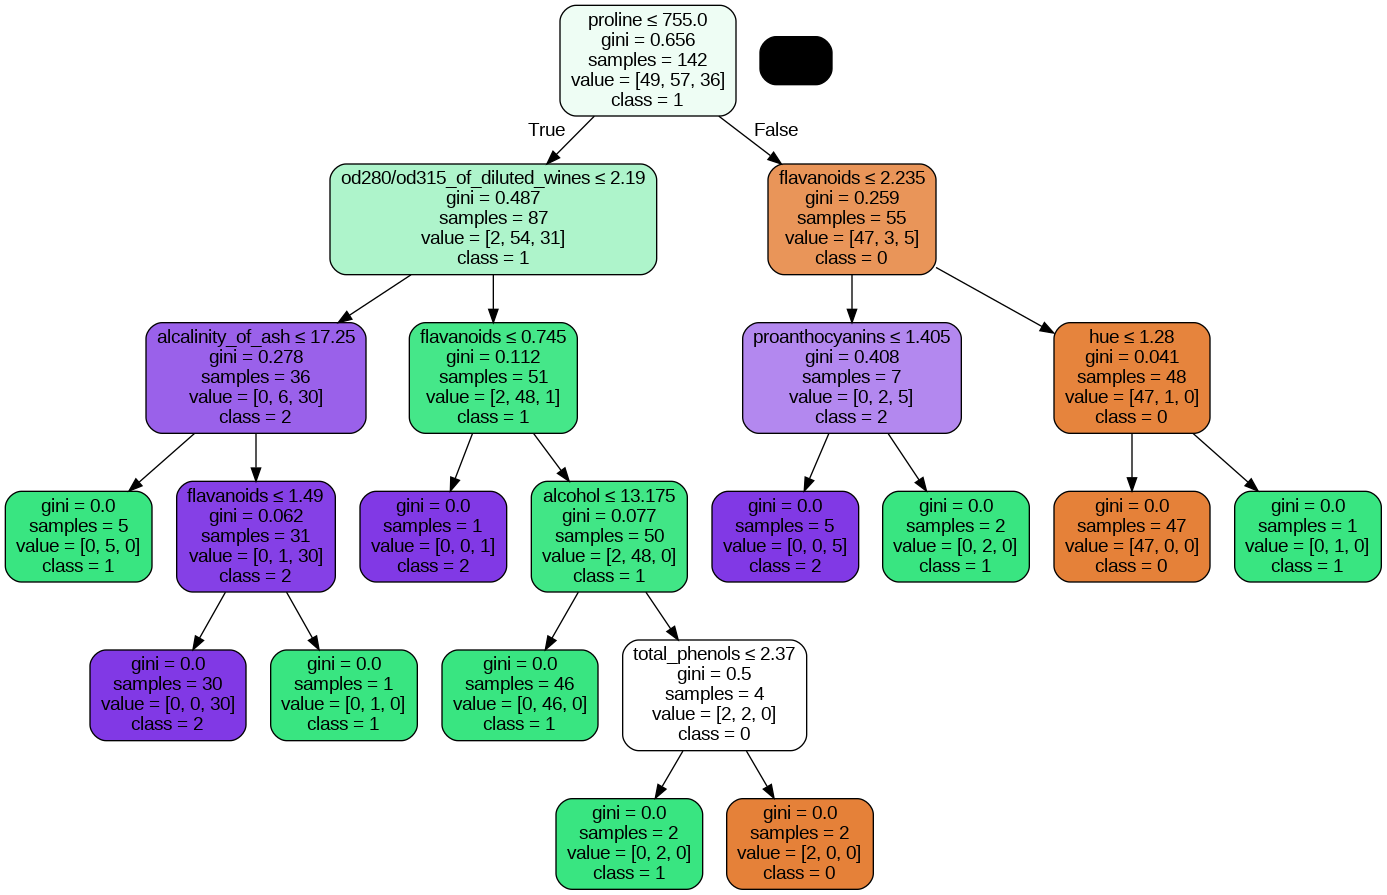

In [33]:
#Run this code cell to see how the tree is making a binary decision (true or false) at each node of the tree
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier #The algorithm

X = wine.data
y = wine.target

y_2 = [str(x) for x in y]
X_train, X_test, y_train, y_test = train_test_split(X,y_2,test_size=0.2)

DT_classifier_2 = DecisionTreeClassifier()
DT_classifier_2.fit(X_train, y_train)

dot_data = StringIO()
export_graphviz(DT_classifier_2, out_file=dot_data, feature_names=wine.feature_names, class_names= DT_classifier_2.classes_, 
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

##### You can see that each in node where a decision needs to be made, the algorithm determines a very a specific value of a feature and applies binary classification on how the tree system is further split. 

Decision trees become more sensitive to the data as we move deeper into the tree and can induce bias in your model. A way to help with this is using multiple trees together (an ensemble) and which gives rise to an algorithm called 'Random Forest'. You will come across this in lab 4. 

## Lab Activity Two: DT on Categorical Data

Download the play tennis dataset from kaggle here: https://www.kaggle.com/sdk1810/playtennis. This dataset contains weather conditions (features) which play a part in deciding whether someone plays tennis or not.


##### [A8] Load the play tennis csv and prepare it for machine learning

In [34]:
# make a list of names for the features
features = ["outlook", "temp", "humidity", "windy"]
# label name
label = "play"
# combine feature names and label name into a single list for pandas to use
column_names = features + [label]

# path to data
file_name = 'PlayTennis.csv'
data_url = "https://raw.githubusercontent.com/cboyda/MachineLearning/main/PlayTennis.csv"


#__readheader(pd,1,data_url)

# create a pandas DataFrame from the CSV file available at the above-specified URL
#df = pd.read_csv(data_url, index_col=5,header=0, names=column_names)
df = pd.read_csv(data_url, header=0)
df

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [35]:
features

['outlook', 'temp', 'humidity', 'windy']

In [36]:
label

'play'

In [37]:
len(df)

14

In [38]:
df.shape


(14, 5)

In [39]:
df.describe()

,outlook,temp,humidity,windy,play
count,14,14,14,14,14
unique,3,3,2,2,2
top,sunny,mild,high,False,yes
freq,5,6,7,8,9


In [40]:
#machine learning algorithms can only learn from numbers (int, float, doubles .. )
#so let us encode it to int
from sklearn import preprocessing

In [41]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder                  #encode your data


In [42]:
X_preprocess = make_column_transformer((OrdinalEncoder(), features), 
                                       remainder='drop')
y_preprocess = LabelEncoder()

In [43]:
display(X_preprocess, y_preprocess)

ColumnTransformer(transformers=[('ordinalencoder', OrdinalEncoder(),
                                 ['outlook', 'temp', 'humidity', 'windy'])])

LabelEncoder()

In [44]:
# create the actual converted data matrices (including the label vector) using the preprocessor objects we just created
X = X_preprocess.fit_transform(df[features])
y = y_preprocess.fit_transform(df[label])

In [45]:
display(X,y)

array([[2., 1., 0., 0.],
       [2., 1., 0., 1.],
       [0., 1., 0., 0.],
       [1., 2., 0., 0.],
       [1., 0., 1., 0.],
       [1., 0., 1., 1.],
       [0., 0., 1., 1.],
       [2., 2., 0., 0.],
       [2., 0., 1., 0.],
       [1., 2., 1., 0.],
       [2., 2., 1., 1.],
       [0., 2., 0., 1.],
       [0., 1., 1., 0.],
       [1., 2., 0., 1.]])

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

##### [A9] Instantiate and fit a decision tree classifer onto your data and then evaluate your model

In [46]:
#To divide our data into training and test sets:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30) 

In [47]:
# perform training 
from sklearn.tree import DecisionTreeClassifier               # import the classifier
classifier =DecisionTreeClassifier()                          # create a classifier object
classifier.fit(X_train, y_train)                              # fit the classifier with X and Y data 

DecisionTreeClassifier()

In [48]:
#Predict the response for test dataset
y_pred= classifier.predict(X_test)  

In [49]:
# Model Accuracy, how often is the classifier correct?
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.4


Now let's compare some of our predicted values with the actual values and see how accurate we were:

In [50]:
data_p = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})  
data_p

,Actual,Predicted
0,1,0
1,0,1
2,1,1
3,0,0
4,0,1


In [51]:
print("Results on play tennis test data:")
print(classification_report(y_test, y_pred))

Results on play tennis test data:
              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       0.33      0.50      0.40         2

    accuracy                           0.40         5
   macro avg       0.42      0.42      0.40         5
weighted avg       0.43      0.40      0.40         5



##### [A10] Visualize the tree in detail using a graphic library (You can use the code  above or find another method to visualize the tree. There are simpler ones out there)

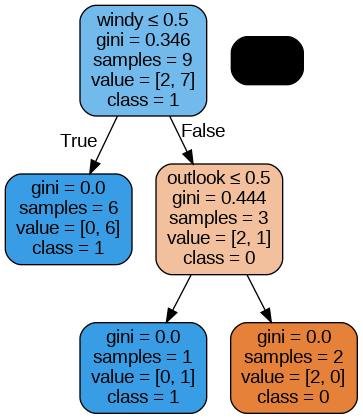

In [52]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,
filled=True, rounded=True,
special_characters=True,feature_names =features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Play Tennis.png')
Image(graph.create_png())